In [43]:
import pandas as pd

# Cleaning Data

<center><img src="https://media.giphy.com/media/3DnDRfZe2ubQc/giphy.gif" width="400" height="400" />

So at this point you should have done some background research on your data and started to explore it to better understand the contents and some of the general trends and patterns. Throughout that process you will more than likely discover that there are issues with the data that you are working with. Before moving on to the main analysis it is important to deal with these issues as best you can with **<span style='color:blue'>data cleaning</span>**.

# What is Data Cleaning?

**Data Cleaning** : the process of detecting, correcting, and/or removing corrupted, inaccurate, incorrectly formatted, irrelevant, missing, and duplicate data within a dataset. 

The reality is that data in the real world is messy (usually more messy than the nice data used in general online tutorials) and dirty data can give you inaccurate results from your analysis. Cleaning data takes time (~20-30% of a data analysts time depending on the dataset), but this step is **very important** to make sure that all future steps are as effective as possible. 

Data cleaning depends on the dataset being cleaned, but in general it will include:
* removing unnecessary data
* modifying the data to make it more understandable/easier to work with
* handling missing values
* handling duplicate data
* handling outliers
* fixing harmful data inconsistencies
* reshaping the data

__________________

# Remove Unnecessary Data

<center><img src="https://media0.giphy.com/media/du9tUy0lntYsqGF2Ye/giphy.gif" width="500" height="500" />

After doing the work to understand the columns and revisit your analysis goals (from the EDA step) you can think about which columns you really need. If there are some that you know you don't need, drop them so that you don't waste time cleaning them!

To drop a column from a dataframe use: 

`dataframe_name.drop([col_names_to_drop], axis=1, inplace = True)` 

From our past exploration we saw that the cabin number is very sparse in this dataset. Because of that it is probably not very useful for whatever analysis that we would want to do, so we can get rid of it: 

In [66]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [68]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

________________________________

# Modify Data for Understandability and Ease of Use

<center><img src="https://www.reactiongifs.com/r/2013/07/reference.gif" width="500" height="500" />

Based upon your previous exploration, you may have come to realize that there are certain column names or values that are not as clear as they could be. For you own sake and the sake of anyone looking at your analysis, you want to make sure that everythin is as easy to understand as possible. 

### Rename Columns

If you can think of a more clear and understandable name for columns in a dataset you can change them using:

`
dataframe_name.rename(columns = {'col1_old_name' : 'col1_new_name', 'col2_old_name' : 'col2_new_name',...}, inplace = True)
`

In [69]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

It is not immediately apparent what 'Pclass' means unless you look at the dataset documentation, where we find that 'Pclass' actually refers to the Ticket Class (as in 1st class, 2nd class, etc.). To make sure that we remember this and that others viewing our data don't have to go digging through documentation as well, let's change that:

In [70]:
titanic_df.rename(
    columns = {
        'Pclass' : 'Ticket_Class'
    },
    inplace = True
)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Ticket_Class', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [71]:
# What are some other column names that aren't very clear?
# Change them to more understandable names
titanic_df.rename(
    columns = {
        'Parch' : 'Num_parents_children',
        'SibSp' : 'Num_siblings_spouses'
    },
    inplace = True
)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Ticket_Class', 'Name', 'Sex', 'Age',
       'Num_siblings_spouses', 'Num_parents_children', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

### Rename Values

Sometimes if you have a categorical column the category names are not very clear. For instance you will likely encounter situations where the actual categories have been abstracted to numbers, like with the `Survived` column in the titanic data:

In [72]:
titanic_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

To make these value more clear use:

`
dataframe_name['col_name_with_value'].replace(to_replace = {'old_value1' : 'new_value1', 'old_value2' : 'new_value2', ...}, inplace = True)
`

In [73]:
titanic_df['Survived'] = titanic_df['Survived'].replace(
                            to_replace = {
                                0:'No',
                                1:'Yes'
                            }
                        )

titanic_df

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,Num_siblings_spouses,Num_parents_children,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [74]:
# What is another column that could have more clear categories? 
# Replace the old categories with more understandable ones.
titanic_df['Embarked'].replace(
    to_replace = {'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'},
    inplace=True
)
titanic_df.head()

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,Num_siblings_spouses,Num_parents_children,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


______________________

# Handle Missing Data

<center><img src="https://media1.tenor.com/images/6875b3e930118d3dc0154485dd0c7efd/tenor.gif?itemid=12327903" width="300" height="300" />

We talked last week about wanting to check for how sparse your dataset is, and we also mentioned the possible different methods for handling this issues. As a recap, some ways you may end up handling Null values are:

1. Determine that the data is too sparse to provide meaningful results.

1. Leave them and just account for them in analysis (perhapss replace empty values with a constant value like 'MISSING').

1. Delete all of the rows with missing values

1. Fill in the missing values with:

    - results from regression
    
    - the average value for the column
    
    - the most common value for that column

For instance, from last week we learned that there are 2 rows that are missing a value in the 'Embarked' column.

In [16]:
titanic_df['Embarked'].isnull().sum()

2

Depending on the situation we could choose to handle this in different ways, but one of those could be to replace those empty values with 'Unknown' as a new category. Replacements like this are especially helpful for determining if there is a trend to the missing data in a dataset. 

To replace the missing values in a column with a new value use:

`
dataframe_name['col_name_with_missing_data'].fillna(value = value_to_replace_missing_data, inplace=True)
`

In [75]:
titanic_df['Embarked'].fillna(value='Unknown', inplace=True)

titanic_df['Embarked'].isnull().sum()

0

In [76]:
titanic_df['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: Embarked, dtype: int64

________________________

# Handle Duplicate Data

<center><img src="https://media1.giphy.com/media/mc7uduXz800wtqU7WV/giphy.gif" width="400" height="400" />

Duplicates are rows that give redundant information. This may or may not mean that they are the same in every column. 

*Can you think of situations that would cause duplicate data?*

In certain datasets repeated data may be significant, but other times it is a mistake. To see if there are rows that share the same values in every single column you can use `dataframe_name.duplicated().sum()`:

In [15]:
titanic_df.duplicated().sum()

0

If there were duplicates that shared every single column, you could drop them using:

`
dataframe_name.drop_duplicates(inplace=True)
`

Careful though! Don't automatically assume that if the above function returns 0 that there aren't any duplicates. There may be a situation where each time a row is added to the dataset it is automatically given a unique ID value. In this case there could be rows that are exactly the same except for the value in that ID column. To see if this is the case, can use something like `df[df.drop(columns=['id']).duplicated()]`. If there are duplicates that share everything but the ID column you could drop those with `df_new = df.drop_duplicates(subset=key)` where key is a list that contains the names of all of the other columns that should be taken into account during the deduplication.

In [79]:
titanic_df[titanic_df.drop(columns=['PassengerId']).duplicated()]

,PassengerId,Survived,Ticket_Class,Name,Sex,Age,Num_siblings_spouses,Num_parents_children,Ticket,Fare,Embarked


_________________________

# Handle Outliers

<center><img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2014/09/outlier.gif?fit=609%2C341&ssl=1" width="500" height="500" />

**Outlier** - data point (or group of points) that is significantly different from the other observations. 

An outlier could be a legitimate data point with an explanation, or it could be a mistake. A mistake needs to be corrected or deleted, while a legitimate outlier could provide some useful information and insights. So just like with duplicate data or missing values you'll need to think about how they should be addressed.

An outlier can either be with respect to a single column (e.g. everything else is normal but the person's age is recorded as 250) or when taking several columns into consideration (e.g. if you plot age vs. running speed and there is a data point for a person with an age of 80 with a running speed of 20mph). 

### One-Dimensional Outliers

A one-dimensional outlier is where a value is significantly different than the other values in the same column. To look for these you can look at quantiles:

In [82]:
titanic_df['Age'].quantile([.25, .5, .75, 1])

0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: Age, dtype: float64

Or you can look for anomalies in visualizations like a histogram:

<AxesSubplot:ylabel='Frequency'>

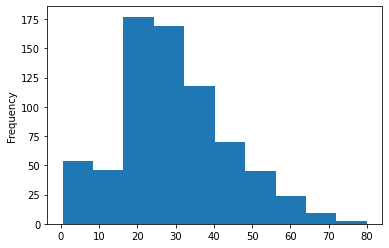

In [87]:
titanic_df['Age'].plot(kind='hist')

**<span style='color:orange'>Note</span>** : this is an example of how you can make some quick and dirty plots natively with pandas. These are great for exploration and answering on-the-fly questions. We'll learn how to make much better visualizations in a couple of weeks.

Or with a box plot (which is like a visual representation of the quantiles) where outliers are marked by dots that are outside of the box's 'whiskers':

<center><img src="https://chartio.com/assets/26dba4/tutorials/charts/box-plots/046df50d3e23296f1dda99a385bd54925317c413ffff2a63779ffef0a42b9434/box-plot-construction.png" width="400" height="400" />

<AxesSubplot:>

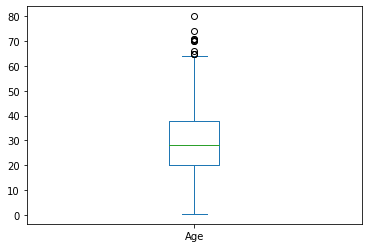

In [35]:
titanic_df['Age'].plot(kind='box')

(for more information on box plots, see https://chartio.com/learn/charts/box-plot-complete-guide/)

**<span style='color:red'>Warning</span>** : just because data points are marked as 'outliers' on a boxplot doesn't mean that they need to be removed or fixed, it just means that they are far from where most of the points are and are worth investigating.

### Multi-Dimensional Outliers

A multi-dimensional outlier means that the values for that row may not be uncommon in their own columns, but the combination of the different values is uncommon. 

To find these you will usually be using something like a scatter plot:

<AxesSubplot:xlabel='Age', ylabel='Fare'>

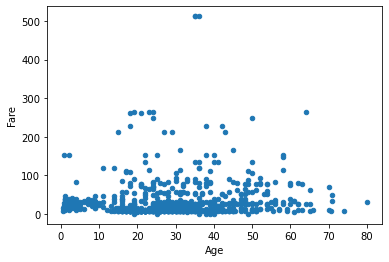

In [37]:
titanic_df.plot(x='Age', y='Fare', kind='scatter')

_____________________

# Write Results to a File

You are going to want to save all of that good work!

In [88]:
titanic_df.to_csv('cleaned_titanic_data_v1.csv')